In [1]:
%pylab inline
from classy import *

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


Version:  0.0.17


## curvy data

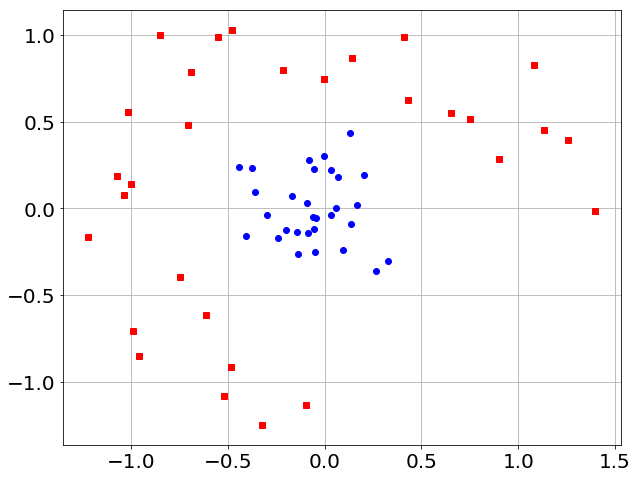

In [2]:
N=30
x1=randn(N)*.2
y1=randn(N)*.2

plot(x1,y1,'bo')

a=linspace(0,3*pi/2,N)
x2=cos(a)+randn(N)*.2
y2=sin(a)+randn(N)*.2

plot(x2,y2,'rs')



In [3]:
vectors=vstack([hstack([atleast_2d(x1).T,atleast_2d(y1).T]),
        hstack([atleast_2d(x2).T,atleast_2d(y2).T]),
        ])
targets=concatenate([zeros(N),ones(N)])
target_names=['center','around']
feature_names=['x','y']

In [4]:
data=Struct(vectors=vectors,targets=targets,
                target_names=target_names,feature_names=feature_names)

('On Training Set:', 0.9916666666666667)


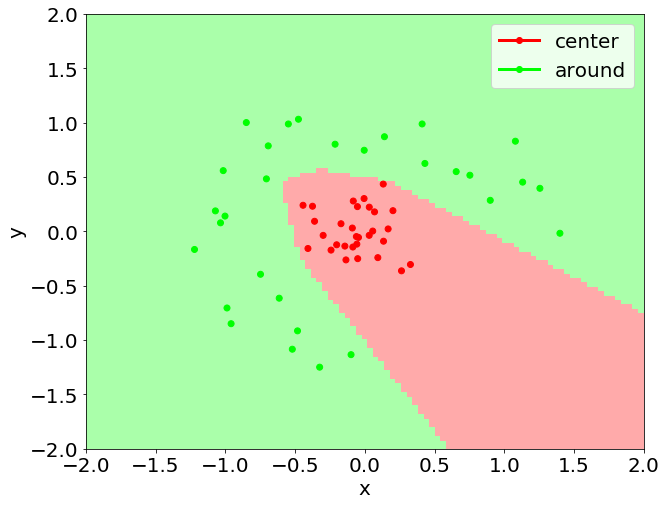

In [6]:
C=KerasMLP(hidden_layer_sizes = [6],epoch=400)
C.fit(data.vectors,data.targets)
print(("On Training Set:",C.percent_correct(data.vectors,data.targets)))
plot2D(data,classifier=C,axis_range=[-2,2,-2,2])